<a href="https://colab.research.google.com/github/fluffymouses/fluffymouses/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv("/content/Student_Performance.csv")


df['Extracurricular Activities'] = [1 if item == 'Yes' else 0 for item in df['Extracurricular Activities']]

df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [ ]:
X = df
y = df['Performance Index'] # целевая переменная
X = X.drop('Performance Index', axis=1) # признаки для исследования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test # 1279 строк на оубчение и 320 строк на валидацию

(9254    36.0
 1561    25.0
 1670    59.0
 6087    22.0
 6669    40.0
         ... 
 5734    48.0
 5191    51.0
 5390    44.0
 860     20.0
 7270    24.0
 Name: Performance Index, Length: 8000, dtype: float64,
 6252    51.0
 4684    20.0
 1731    46.0
 4742    28.0
 4521    41.0
         ... 
 6412    45.0
 8285    66.0
 7853    16.0
 1095    65.0
 6929    47.0
 Name: Performance Index, Length: 2000, dtype: float64)

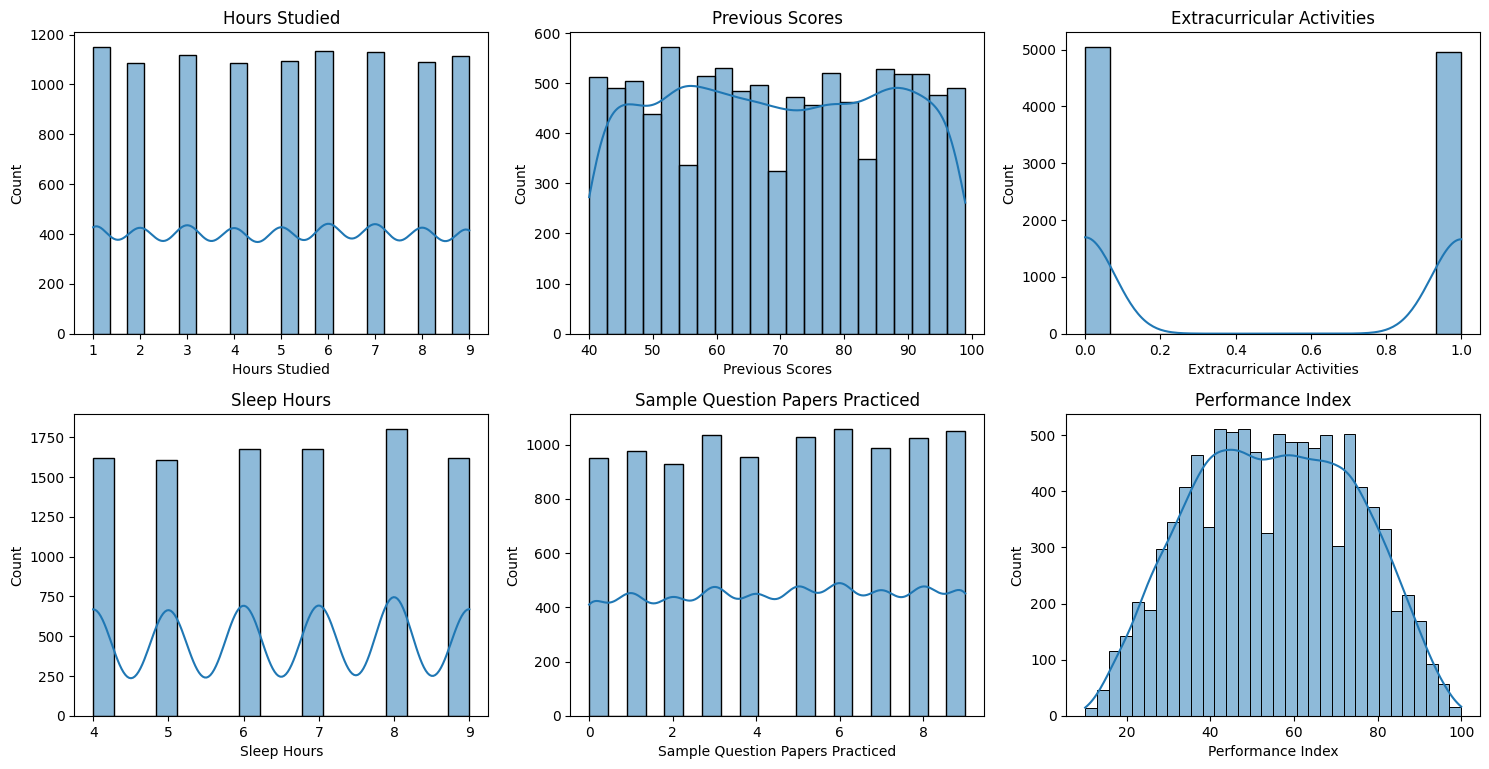

In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns  # выбираем числвоые колонки
cat_columns  = df.select_dtypes(include=['category']).columns # выбираем категориальные колонки
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

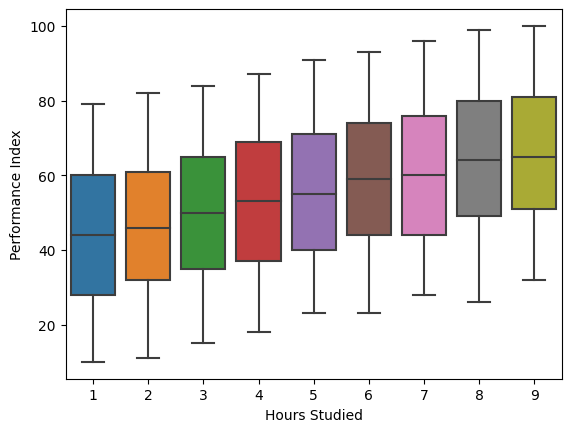

In [ ]:
sns.boxplot(data=df, x='Hours Studied', y='Performance Index')

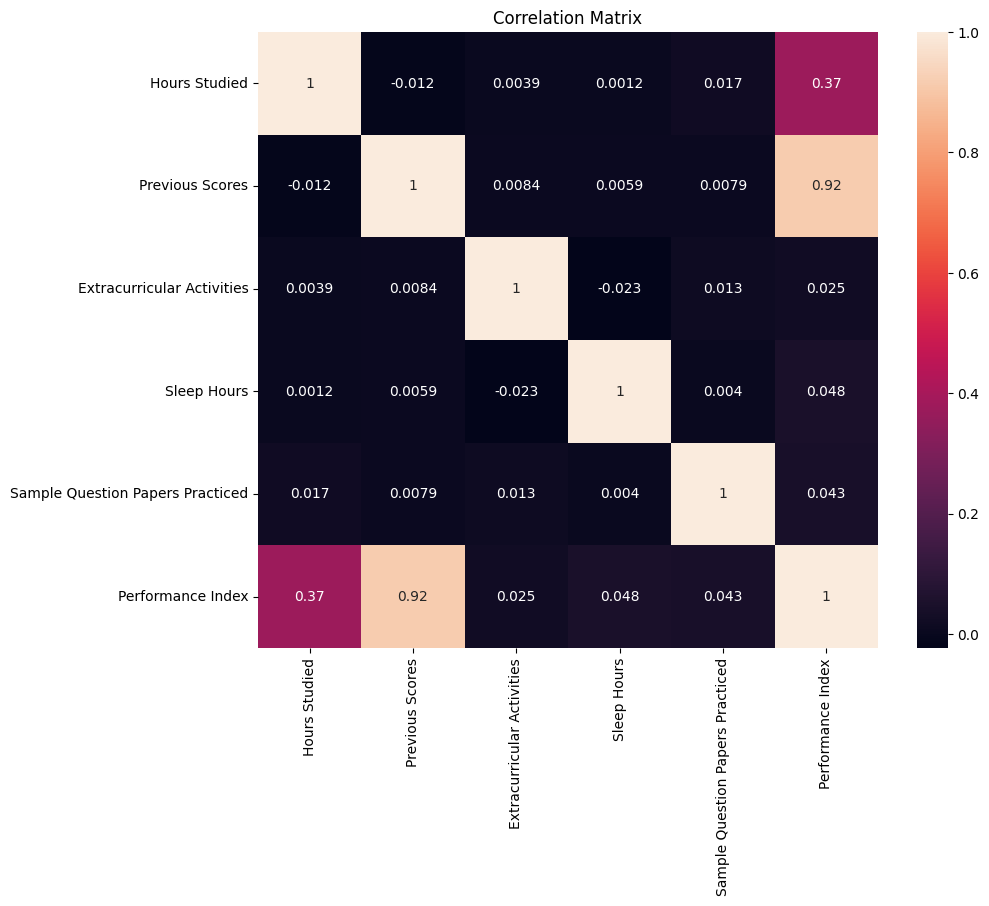

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
'Переменные для анализа - Perfomance index вместе с Hours Studied и Previous Score, так как там наибольшая зависимость судя по матрице корреляции'

'Переменные для анализа - Perfomance index вместе с Hours Studied и Previous Score, так как там наибольшая зависимость судя по матрице корреляции'

### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [ ]:
df2 = df[['Hours Studied', 'Previous Scores', 'Performance Index']]


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def transform_dataframe(df2):
    # Проверка на наличие необходимых столбцов
    required_columns = ['Hours Studied', 'Previous Scores']
    if not all(column in df.columns for column in required_columns):
        raise ValueError("DataFrame must contain the required columns.")

    # Создание копии DataFrame, чтобы не изменять исходный df
    df_transformed = df.copy()

    # Преобразование первых четырех признаков с помощью StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[required_columns[:-1]])

    # Преобразование 'ph_bins' с помощью pd.get_dummies
    ph_bins_dummies = pd.get_dummies(df_transformed['Hours Studied'], prefix='H')

    # Объединение масштабированных признаков и dummy переменных
    df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:-1])
    df_transformed = pd.concat([df_transformed, ph_bins_dummies], axis=1)

    return df_transformed

df_research = transform_dataframe(df[['Hours Studied', 'Previous Scores']])
pd.concat([df_research, df['Performance Index'], ], axis=1)

,Hours Studied,H_1,H_2,H_3,H_4,H_5,H_6,H_7,H_8,H_9,Performance Index
0,0.775188,0,0,0,0,0,0,1,0,0,91.0
1,-0.383481,0,0,0,1,0,0,0,0,0,65.0
2,1.161410,0,0,0,0,0,0,0,1,0,45.0
3,0.002742,0,0,0,0,1,0,0,0,0,36.0
4,0.775188,0,0,0,0,0,0,1,0,0,66.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.542149,1,0,0,0,0,0,0,0,0,23.0
9996,0.775188,0,0,0,0,0,0,1,0,0,58.0
9997,0.388965,0,0,0,0,0,1,0,0,0,74.0
9998,1.547633,0,0,0,0,0,0,0,0,1,95.0


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Выборка признаков и целевой переменной
X = df_research
y = df['Performance Index']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }


In [7]:
model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 15.395057495117188,
 'MSE': 316.19198792135717,
 'R2': 0.14235103850692565,
 'mape (reverted - % верно угаданых)': 64.99061911672273,
 'mape (original - % ошибок)': 35.00938088327728}

In [9]:
y_pred = model.predict(X_test)
compute_metrics(y_test, y_pred)

{'MAE': 15.55440576171875,
 'MSE': 322.51621494531634,
 'R2': 0.12971082479924456,
 'mape (reverted - % верно угаданых)': 63.69775261294388,
 'mape (original - % ошибок)': 36.30224738705611}

In [10]:

coefficients = model.coef_
coefficients

array([ 7.90151456e+13,  1.15659316e+14,  8.51418681e+13,  5.46244200e+13,
        2.41069720e+13, -6.41047607e+12, -3.69279241e+13, -6.74453722e+13,
       -9.79628202e+13, -1.28480268e+14])

### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [17]:
X.shape

(8000, 10)

In [18]:
X_train.shape

(8000, 10)

In [19]:
import numpy as np

def linear_regression(X, y, learning_rate=0.01, max_iter=1000):
    m = len(y)
    X = np.c_[np.ones(m), X]
    theta = np.zeros(X.shape[1])
    prev_theta = np.zeros(X.shape[1])
    unchanged_count = 0

    for iteration in range(max_iter):
        gradients = -2/m * X.T.dot(y - X.dot(theta))
        prev_theta = theta.copy()
        theta -= learning_rate * gradients

        if np.allclose(prev_theta, theta):
            unchanged_count += 1
        else:
            unchanged_count = 0

        if unchanged_count >= 5:
            break


    print('коэфциенты регрессии: ', theta)
    return X.dot(theta)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X)
X = np.array(X_train)
y = np.array(y_train)


y_pred = linear_regression(X, y)

compute_metrics(y, y_pred)


0.12971082479924456
коэфциенты регрессии:  [49.8026324   6.50509973  4.94796633  4.23811673  4.80760283  5.15342206
  5.58572347  6.37289164  5.1295614   7.13729189  6.43005604]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


{'MAE': 15.393331266177688,
 'MSE': 316.15210890395923,
 'R2': 0.14245920759141617,
 'mape (reverted - % верно угаданых)': 64.99545318146431,
 'mape (original - % ошибок)': 35.00454681853569}

In [33]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train)
print(neigh.predict(X_test).round(2))
print(neigh.predict(X_train))

"""y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)"""
compute_metrics(y_test, y_pred)


[68.6 37.2 49.  ... 37.2 45.6 68.6]
[68.6 37.2 37.2 ... 65.8 55.6 37.2]


{'MAE': 19.623833333333337,
 'MSE': 580.5957222222222,
 'R2': -0.5667000566267271,
 'mape (reverted - % верно угаданых)': 55.04967814822015,
 'mape (original - % ошибок)': 44.95032185177985}

In [34]:

pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

,y_pred,y_test
6252,28.000000,51.0
4684,50.666667,20.0
1731,62.666667,46.0
4742,53.333333,28.0
4521,62.666667,41.0
...,...,...
6412,50.666667,45.0
8285,27.666667,66.0
7853,50.666667,16.0
1095,72.666667,65.0


##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""